<a href="https://colab.research.google.com/github/firarru/ML-Manual-Naive-Bayes/blob/uts/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
df_train = pd.read_excel("https://raw.githubusercontent.com/firarru/ML-Manual-Naive-Bayes/uts/Dataset/train_data.xlsx")
df_train

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi,Status BMI
0,Female,21,1.61,68.11,yes,yes,1.98,3.55,no,no,2.22,no,0.98,0.460,Sometimes,Public_Transportation,Overweight_Level_I
1,Female,19,1.63,77.86,yes,no,2.70,3.00,Sometimes,no,2.47,no,1.86,1.000,Sometimes,Public_Transportation,Overweight_Level_II
2,Female,22,1.61,82.47,yes,yes,1.56,1.00,Sometimes,no,2.37,no,0.29,2.000,Sometimes,Public_Transportation,Obesity_Type_I
3,Female,26,1.61,107.01,yes,yes,3.00,3.00,Sometimes,no,2.68,no,0.00,0.509,Sometimes,Public_Transportation,Obesity_Type_III
4,Female,44,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,Female,18,1.60,56.00,yes,yes,2.00,1.00,Always,no,2.00,no,1.00,0.000,Sometimes,Walking,Normal_Weight
1675,Male,35,1.82,91.63,yes,yes,2.00,2.99,Sometimes,no,1.29,no,0.88,0.854,Sometimes,Automobile,Overweight_Level_II
1676,Female,22,1.60,68.02,yes,yes,1.90,3.27,no,no,2.93,no,0.99,0.308,Sometimes,Public_Transportation,Overweight_Level_I
1677,Male,19,1.80,80.00,no,yes,2.00,1.00,Sometimes,no,2.00,no,2.00,1.000,Sometimes,Public_Transportation,Normal_Weight


In [3]:
df_test = pd.read_excel("https://raw.githubusercontent.com/firarru/ML-Manual-Naive-Bayes/uts/Dataset/test_data.xlsx")
df_test

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi
0,Male,21,1.69,99.53,yes,yes,2.00,1.67,Sometimes,no,2.00,no,0.00,1.946,no,Public_Transportation
1,Male,23,1.74,93.50,no,yes,2.00,3.00,Frequently,yes,1.00,no,1.00,1.000,Frequently,Automobile
2,Female,22,1.75,133.85,yes,yes,3.00,3.00,Sometimes,no,2.75,no,1.43,0.903,Sometimes,Public_Transportation
3,Female,22,1.59,44.01,no,no,3.00,1.61,Frequently,no,2.57,no,1.19,0.000,no,Public_Transportation
4,Male,18,1.78,108.04,yes,yes,2.00,2.66,Sometimes,no,2.30,no,1.00,0.553,no,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Male,23,1.76,120.02,yes,yes,2.97,2.81,Sometimes,no,1.96,no,1.58,0.505,Sometimes,Public_Transportation
416,Female,18,1.62,68.00,no,no,2.00,1.00,Sometimes,no,1.00,no,0.00,2.000,no,Public_Transportation
417,Male,32,1.67,90.00,yes,yes,2.95,1.78,Sometimes,no,2.21,no,1.99,0.000,Sometimes,Automobile
418,Female,26,1.64,104.81,yes,yes,3.00,3.00,Sometimes,no,2.65,no,0.07,0.630,Sometimes,Public_Transportation


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis Kelamin              1679 non-null   object 
 1   Umur                       1679 non-null   int64  
 2   Tinggi Badan (m)           1679 non-null   float64
 3   Berat Badan (kg)           1679 non-null   float64
 4   Riwayat Keluarga Obesitas  1679 non-null   object 
 5   FAVC                       1679 non-null   object 
 6   FCVC                       1679 non-null   float64
 7   NCP                        1679 non-null   float64
 8   CAEC                       1679 non-null   object 
 9   Merokok                    1679 non-null   object 
 10  CH2O                       1679 non-null   float64
 11  SCC                        1679 non-null   object 
 12  FAF                        1679 non-null   float64
 13  TUE                        1679 non-null   float

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis Kelamin              420 non-null    object 
 1   Umur                       420 non-null    int64  
 2   Tinggi Badan (m)           420 non-null    float64
 3   Berat Badan (kg)           420 non-null    float64
 4   Riwayat Keluarga Obesitas  420 non-null    object 
 5   FAVC                       420 non-null    object 
 6   FCVC                       420 non-null    float64
 7   NCP                        420 non-null    float64
 8   CAEC                       420 non-null    object 
 9   Merokok                    420 non-null    object 
 10  CH2O                       420 non-null    float64
 11  SCC                        420 non-null    object 
 12  FAF                        420 non-null    float64
 13  TUE                        420 non-null    float64

In [6]:
df_train = df_train.drop_duplicates()

In [7]:
df_train = df_train.fillna(df_train.mode())

In [8]:
df_train.shape

(1662, 17)

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Umur,1662.0,24.317690,6.436288,14.00,20.0000,23.000,26.0000,61.00
Tinggi Badan (m),1662.0,1.702076,0.094207,1.45,1.6300,1.700,1.7700,1.98
Berat Badan (kg),1662.0,86.364832,26.002823,39.00,65.0000,82.885,106.7925,173.00
FCVC,1662.0,2.412750,0.536490,1.00,2.0000,2.345,3.0000,3.00
NCP,1662.0,2.703508,0.769674,1.00,2.6800,3.000,3.0000,4.00
CH2O,1662.0,2.006137,0.609786,1.00,1.5825,2.000,2.4700,3.00
FAF,1662.0,1.015096,0.851803,0.00,0.1325,1.000,1.6800,3.00
TUE,1662.0,0.664862,0.610280,0.00,0.0000,0.628,1.0000,2.00


In [10]:
cat_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']
cat_num = [col for col in df_train.columns if df_train[col].dtype != 'object']

In [11]:
for col in cat_cols:
    print(df_train[col].value_counts())
    print()

Jenis Kelamin
Male      860
Female    802
Name: count, dtype: int64

Riwayat Keluarga Obesitas
yes    1373
no      289
Name: count, dtype: int64

FAVC
yes    1463
no      199
Name: count, dtype: int64

CAEC
Sometimes     1394
Frequently     190
Always          44
no              34
Name: count, dtype: int64

Merokok
no     1632
yes      30
Name: count, dtype: int64

SCC
no     1585
yes      77
Name: count, dtype: int64

CALC
Sometimes     1099
no             512
Frequently      49
Sometim          1
Always           1
Name: count, dtype: int64

Aktifitas Transportasi
Public_Transportation    1237
Automobile                368
Walking                    41
Motorbike                  11
Bike                        4
Name: count, dtype: int64

Status BMI
Obesity_Type_I         281
Obesity_Type_III       243
Obesity_Type_II        241
Overweight_Level_II    235
Normal_Weight          228
Insufficient_Weight    217
Overweight_Level_I     216
Name: count, dtype: int64



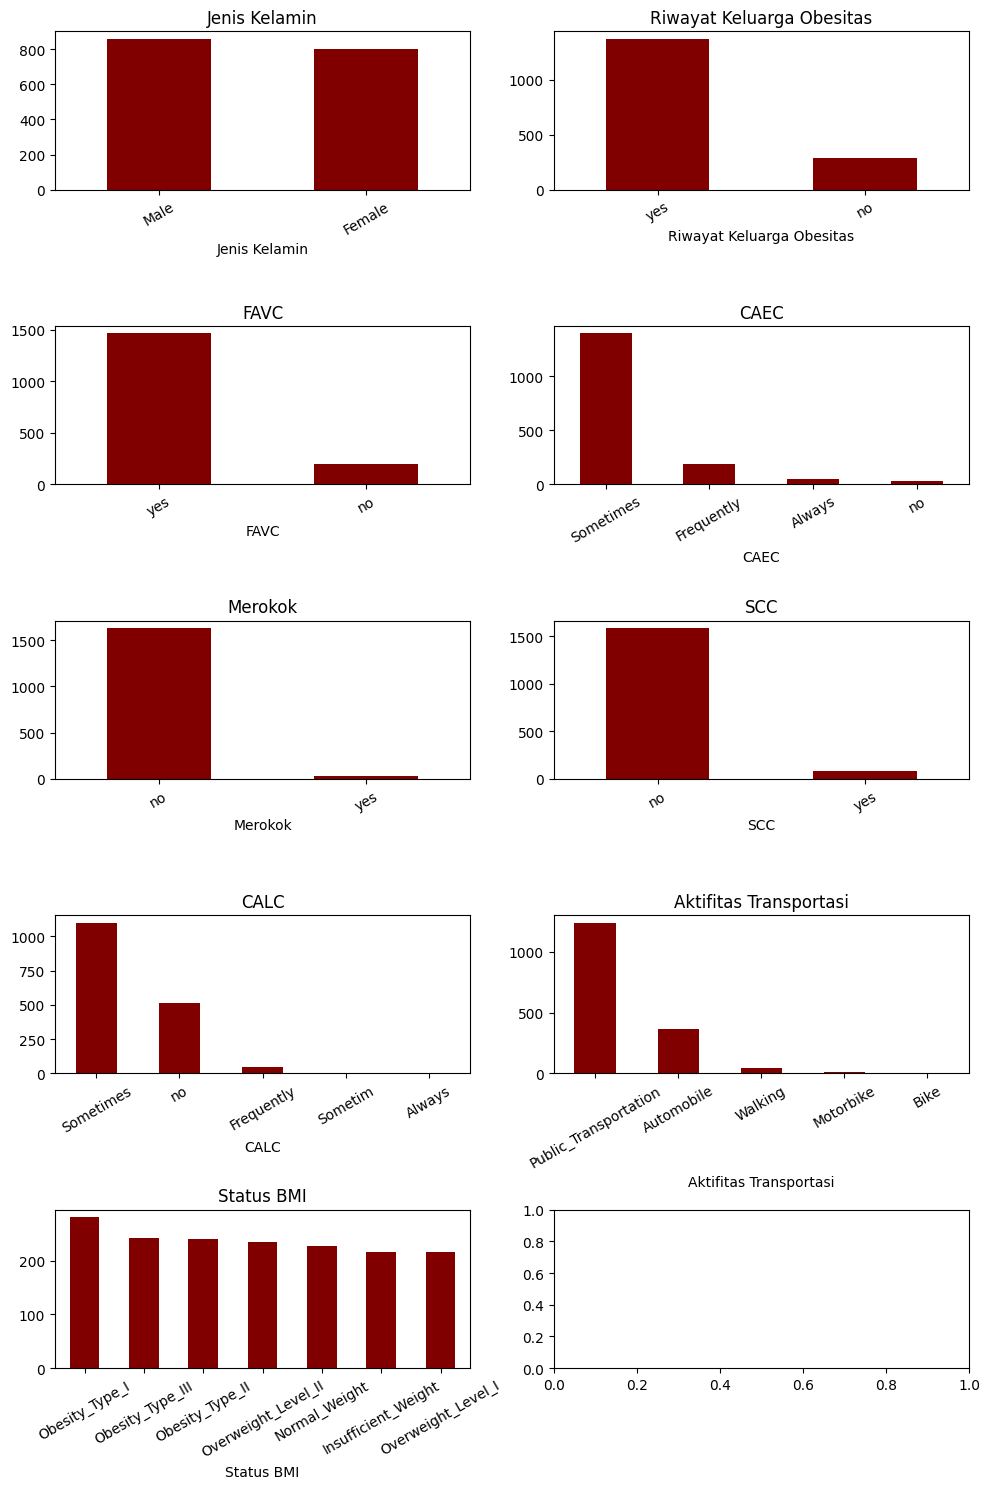

In [12]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    df_train[col].value_counts().plot(kind='bar', ax=axs[i], color='maroon')
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

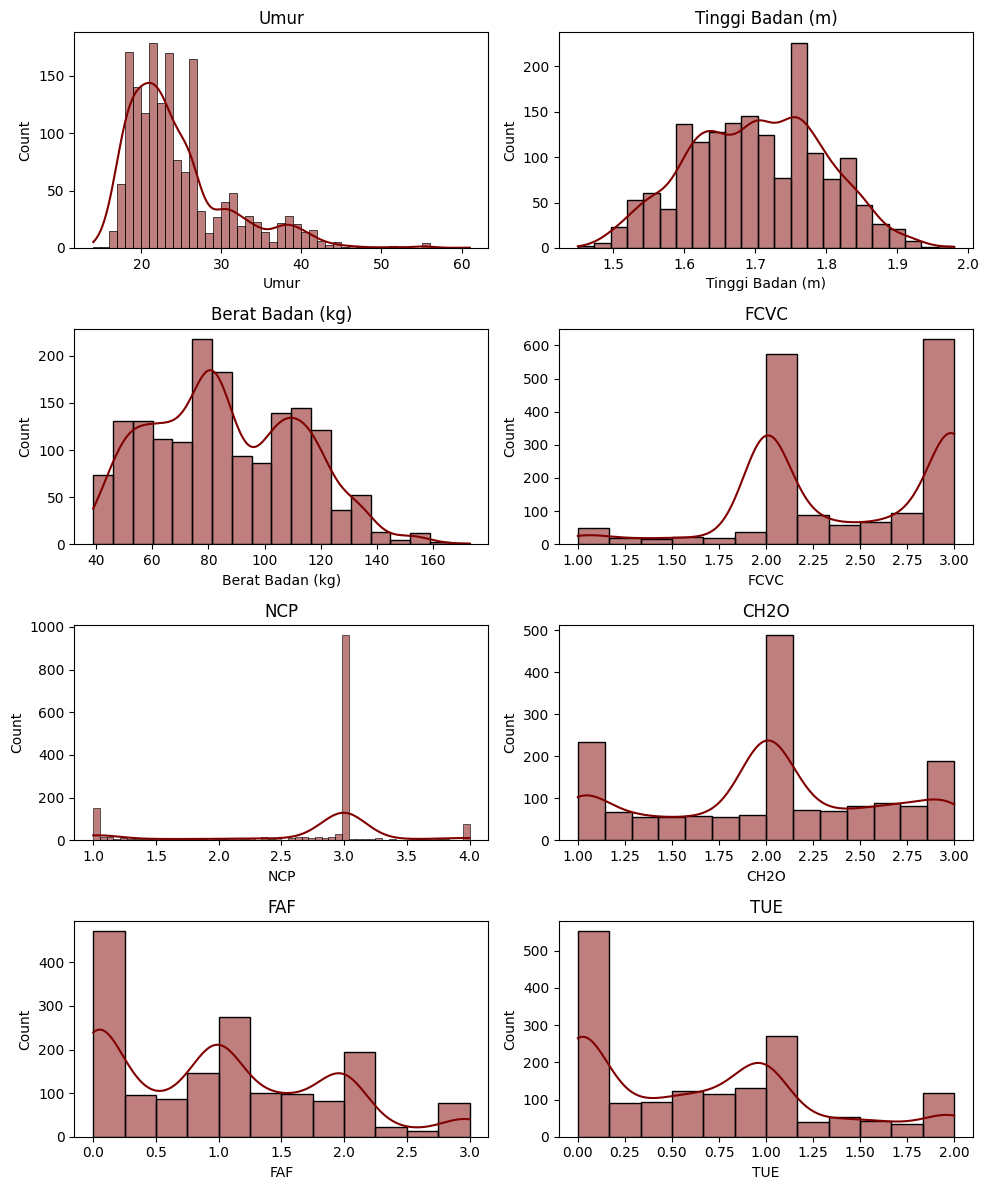

In [13]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axs = axs.flatten()

for i, col in enumerate(cat_num):
    sns.histplot(data=df_train, x=col, kde=True, ax=axs[i], color='maroon')
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

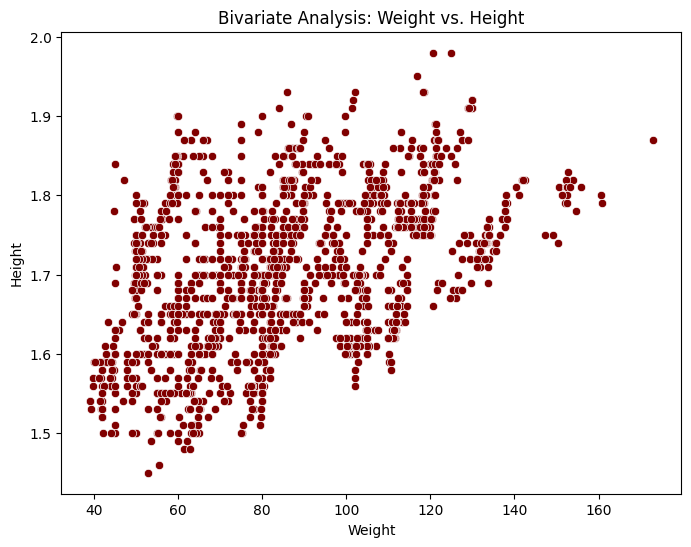

Correlation coefficient between Weight and Height: 0.44659468292673987


In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='Berat Badan (kg)', y='Tinggi Badan (m)', color='maroon')
plt.title('Bivariate Analysis: Weight vs. Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

correlation_coefficient = df_train['Berat Badan (kg)'].corr(df_train['Tinggi Badan (m)'])
print(f"Correlation coefficient between Weight and Height: {correlation_coefficient}")

In [15]:
X_train = df_train.loc[:, df_train.columns != 'Status BMI']
y_train = df_train['Status BMI']

In [16]:
y_train.value_counts()

,count
Status BMI,
Obesity_Type_I,281
Obesity_Type_III,243
Obesity_Type_II,241
Overweight_Level_II,235
Normal_Weight,228
Insufficient_Weight,217
Overweight_Level_I,216


In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = {}
for col in cat_cols:
  if col in X_train.columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoder[col] = le

    if col in df_test.columns:
      df_test[col] = le.transform(df_test[col])

target_col = 'Status BMI'
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(df_train[target_col])

<ipython-input-17-05438f25cc64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col])
<ipython-input-17-05438f25cc64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col])
<ipython-input-17-05438f25cc64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
df_test_scaled = scaler.transform(df_test)

In [19]:
print(X_train_scaled.shape)
print(df_test_scaled.shape)

(1662, 16)
(420, 16)


In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
modelnb = GaussianNB()
modelnb.fit(X_train_scaled, y_train)
y_pred_nb = modelnb.predict(df_test_scaled)

In [22]:
train_accuracy = accuracy_score(y_train, modelnb.predict(X_train_scaled))
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.5643802647412756


In [23]:
df_test_pred = df_test.copy()
df_pred_label = target_encoder.inverse_transform(y_pred_nb)
df_test_pred['Predicted Status BMI'] = df_pred_label
df_test_pred.head()

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi,Predicted Status BMI
0,1,21,1.69,99.53,1,1,2.0,1.67,2,0,2.00,0,0.00,1.946,4,3,Obesity_Type_I
1,1,23,1.74,93.50,0,1,2.0,3.00,1,1,1.00,0,1.00,1.000,1,0,Normal_Weight
2,0,22,1.75,133.85,1,1,3.0,3.00,2,0,2.75,0,1.43,0.903,3,3,Obesity_Type_III
3,0,22,1.59,44.01,0,0,3.0,1.61,1,0,2.57,0,1.19,0.000,4,3,Insufficient_Weight
4,1,18,1.78,108.04,1,1,2.0,2.66,2,0,2.30,0,1.00,0.553,4,3,Obesity_Type_II


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb_classifier = GaussianNB()

grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'var_smoothing': np.float64(0.012328467394420659)}
Best Accuracy: 0.6064926372155288


In [25]:
best_nb_model = grid_search.best_estimator_
y_pred_nb = best_nb_model.predict(df_test_scaled)

In [26]:
df_test_pred = df_test.copy()
df_pred_label = target_encoder.inverse_transform(y_pred_nb)
df_test_pred['Predicted Status BMI'] = df_pred_label
df_test_pred.head()

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi,Predicted Status BMI
0,1,21,1.69,99.53,1,1,2.0,1.67,2,0,2.00,0,0.00,1.946,4,3,Obesity_Type_I
1,1,23,1.74,93.50,0,1,2.0,3.00,1,1,1.00,0,1.00,1.000,1,0,Normal_Weight
2,0,22,1.75,133.85,1,1,3.0,3.00,2,0,2.75,0,1.43,0.903,3,3,Obesity_Type_III
3,0,22,1.59,44.01,0,0,3.0,1.61,1,0,2.57,0,1.19,0.000,4,3,Insufficient_Weight
4,1,18,1.78,108.04,1,1,2.0,2.66,2,0,2.30,0,1.00,0.553,4,3,Obesity_Type_II
